In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-simpsons-characters-dataset/weights.best.hdf5
/kaggle/input/the-simpsons-characters-dataset/annotation.txt
/kaggle/input/the-simpsons-characters-dataset/number_pic_char.csv
/kaggle/input/the-simpsons-characters-dataset/characters_illustration.png
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/milhouse_van_houten_28.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/apu_nahasapeemapetilon_42.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_6.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/lenny_leonard_22.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/marge_simpson_16.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/chief_wiggum_41.jpg
/kaggle/input/the-simpsons-characters-dat

In [16]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from time import strftime
from keras.callbacks import TensorBoard
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten

In [3]:
char_path = '../input/the-simpsons-characters-dataset/simpsons_dataset'
LOG_DIR = '/simpson_model/'

In [4]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))
    
char_dict

{'rainier_wolfcastle': 45,
 'maggie_simpson': 128,
 'krusty_the_clown': 1206,
 'waylon_smithers': 181,
 'professor_john_frink': 65,
 'fat_tony': 27,
 'ralph_wiggum': 89,
 'otto_mann': 32,
 'martin_prince': 71,
 'barney_gumble': 106,
 'ned_flanders': 1454,
 'patty_bouvier': 72,
 'sideshow_mel': 40,
 'marge_simpson': 1291,
 'abraham_grampa_simpson': 913,
 'selma_bouvier': 103,
 'mayor_quimby': 246,
 'disco_stu': 8,
 'lionel_hutz': 3,
 'simpsons_dataset': 42,
 'troy_mcclure': 8,
 'agnes_skinner': 42,
 'groundskeeper_willie': 121,
 'kent_brockman': 498,
 'charles_montgomery_burns': 1193,
 'carl_carlson': 98,
 'chief_wiggum': 986,
 'apu_nahasapeemapetilon': 623,
 'bart_simpson': 1342,
 'edna_krabappel': 457,
 'gil': 27,
 'comic_book_guy': 469,
 'principal_skinner': 1194,
 'cletus_spuckler': 47,
 'milhouse_van_houten': 1079,
 'snake_jailbird': 55,
 'nelson_muntz': 358,
 'lisa_simpson': 1354,
 'lenny_leonard': 310,
 'moe_szyslak': 1452,
 'miss_hoover': 17,
 'homer_simpson': 2246,
 'sideshow_b

In [5]:
char_dict = dict(sorted(char_dict.items(), key = lambda item: item[1],reverse=True))
char_dict

{'homer_simpson': 2246,
 'ned_flanders': 1454,
 'moe_szyslak': 1452,
 'lisa_simpson': 1354,
 'bart_simpson': 1342,
 'marge_simpson': 1291,
 'krusty_the_clown': 1206,
 'principal_skinner': 1194,
 'charles_montgomery_burns': 1193,
 'milhouse_van_houten': 1079,
 'chief_wiggum': 986,
 'abraham_grampa_simpson': 913,
 'sideshow_bob': 877,
 'apu_nahasapeemapetilon': 623,
 'kent_brockman': 498,
 'comic_book_guy': 469,
 'edna_krabappel': 457,
 'nelson_muntz': 358,
 'lenny_leonard': 310,
 'mayor_quimby': 246,
 'waylon_smithers': 181,
 'maggie_simpson': 128,
 'groundskeeper_willie': 121,
 'barney_gumble': 106,
 'selma_bouvier': 103,
 'carl_carlson': 98,
 'ralph_wiggum': 89,
 'patty_bouvier': 72,
 'martin_prince': 71,
 'professor_john_frink': 65,
 'snake_jailbird': 55,
 'cletus_spuckler': 47,
 'rainier_wolfcastle': 45,
 'simpsons_dataset': 42,
 'agnes_skinner': 42,
 'sideshow_mel': 40,
 'otto_mann': 32,
 'fat_tony': 27,
 'gil': 27,
 'miss_hoover': 17,
 'disco_stu': 8,
 'troy_mcclure': 8,
 'lionel_

In [6]:
characters = []
count = 0
for i in char_dict:
    characters.append(i)
    count+=1
    if count>=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [8]:
dataset = []
labels = []
for folder in os.listdir(char_path):
    folder_path = os.path.join(char_path,folder)
    if folder in characters:
        print(f'Reading images in folder {folder}...')
        for image in os.listdir(folder_path):
            img = cv.imread(os.path.join(folder_path,image))
#             gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
            img_resized = cv.resize(img, (80, 80),interpolation = cv.INTER_LINEAR)
            image_norm = img_resized/255.0
            dataset.append(image_norm)
            labels.append(characters.index(folder))
        print('Done...')

Reading images in folder krusty_the_clown...
Done...
Reading images in folder ned_flanders...
Done...
Reading images in folder marge_simpson...
Done...
Reading images in folder charles_montgomery_burns...
Done...
Reading images in folder bart_simpson...
Done...
Reading images in folder principal_skinner...
Done...
Reading images in folder milhouse_van_houten...
Done...
Reading images in folder lisa_simpson...
Done...
Reading images in folder moe_szyslak...
Done...
Reading images in folder homer_simpson...
Done...


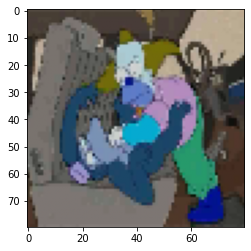

In [9]:
plt.imshow(dataset[0])

In [10]:
X, X_test, y, y_test = train_test_split(dataset, labels, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

NameError: name 'X_train' is not defined

In [ ]:
# X_train = X_train.reshape(X_train.shape[0],6400)
# X_test = X_test.reshape(X_test.shape[0],6400)
# X_val = X_val.reshape(X_val.shape[0],6400)
# X_train

In [ ]:
# def get_tensorboard(model_name):
#     folder_name = f'{model_name} at {strftime("%H %M")}'
#     dir_paths = os.path.join(LOG_DIR,folder_name)
#     try:
#         os.makedirs(dir_paths)
#     except OSError as err:
#         print(err.strerror)
#     else:
#         print('successfuly created directory')
#     return TensorBoard(log_dir=dir_paths )

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [17]:
model = Sequential()
model.add(Conv2D(filters=80,kernel_size=(3,3),activation='relu', input_shape=(80,80,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=160,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
# model.add(tf.keras.Input(shape=(6400,)))
model.add(Flatten())
model.add(Dense(160, activation='relu'))
# model.add(Dropout(0.25,seed = 42))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 78, 78, 80)        2240      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 39, 39, 80)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 160)       115360    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 160)       0         
_________________________________________________________________
flatten (Flatten)            (None, 51840)             0         
_________________________________________________________________
dense (Dense)                (None, 160)               8294560   
_________________________________________________________________
dense_1 (Dense)              (None, 80)               

In [19]:
%%time
nr_epochs = 20
model.fit(X_train,y_train,batch_size=18,epochs = nr_epochs,validation_data=(X_val,y_val))

Epoch 1/20
491/491 [==============================] - 158s 321ms/step - loss: 1.9378 - accuracy: 0.3132 - val_loss: 1.2331 - val_accuracy: 0.5982
Epoch 2/20
491/491 [==============================] - 153s 312ms/step - loss: 1.0634 - accuracy: 0.6410 - val_loss: 1.0316 - val_accuracy: 0.6724
Epoch 3/20
491/491 [==============================] - 153s 311ms/step - loss: 0.6315 - accuracy: 0.7938 - val_loss: 0.9039 - val_accuracy: 0.7222
Epoch 4/20
491/491 [==============================] - 152s 309ms/step - loss: 0.3192 - accuracy: 0.9035 - val_loss: 1.0256 - val_accuracy: 0.7249
Epoch 5/20
491/491 [==============================] - 151s 308ms/step - loss: 0.1689 - accuracy: 0.9534 - val_loss: 1.1321 - val_accuracy: 0.7376
Epoch 6/20
491/491 [==============================] - 151s 307ms/step - loss: 0.0939 - accuracy: 0.9732 - val_loss: 1.2453 - val_accuracy: 0.7466
Epoch 7/20
491/491 [==============================] - 151s 308ms/step - loss: 0.0669 - accuracy: 0.9803 - val_loss: 1.5414 -

In [23]:
labels[0]

6

In [21]:
model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 2, 5, ..., 2, 1, 0])

In [28]:
for number in range(10):
      test_img = np.expand_dims(X_test[number],axis=0)
      predict_val = model.predict_classes(test_img)[0]
      print(f'Actual value: {y_test[number]} vs predicted value: {predict_val}')

Actual value: 2 vs predicted value: 2
Actual value: 2 vs predicted value: 2
Actual value: 5 vs predicted value: 5
Actual value: 1 vs predicted value: 1
Actual value: 3 vs predicted value: 3
Actual value: 3 vs predicted value: 3
Actual value: 0 vs predicted value: 0
Actual value: 4 vs predicted value: 5
Actual value: 7 vs predicted value: 8
Actual value: 7 vs predicted value: 7


In [29]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

87/87 [==============================] - 11s 127ms/step - loss: 2.2381 - accuracy: 0.7231
test loss is 2.24 and test accuracy is 72.3%


In [30]:
from sklearn.metrics import confusion_matrix
predictions = model.predict_classes(X_test)
conf_matrix = confusion_matrix(y_true = y_test,y_pred = predictions)

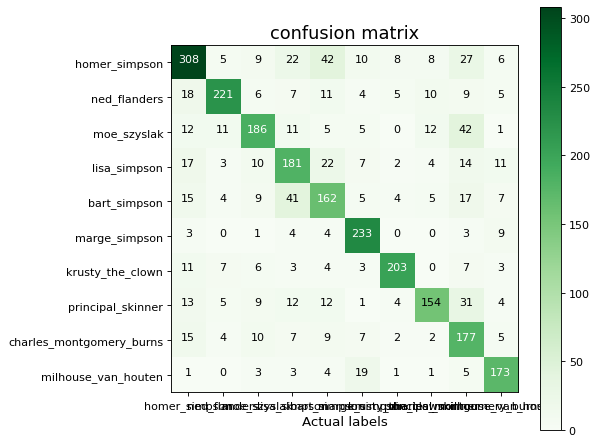

In [31]:
import itertools
plt.figure(figsize=(7,7),dpi = 80)
plt.imshow(conf_matrix,cmap = plt.cm.Greens)

plt.title('confusion matrix',fontsize=16)
plt.xlabel('predicted labels',fontsize=12)
plt.xlabel('Actual labels',fontsize=12)
plt.xticks(np.arange(10),characters)
plt.yticks(np.arange(10),characters)
plt.colorbar()
for i,j in itertools.product(range(10),range(10)):
  plt.text(j,i,conf_matrix[i,j],horizontalalignment = 'center',
           color = 'white' if conf_matrix[i,j] > conf_matrix.max()/2 else 'black')
plt.show()

In [32]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix,axis= 1)
print(recall)
avg_recall = np.mean(recall)
print(f'model 2 average recall score is {avg_recall:0.2%}')

[0.69213483 0.74662162 0.65263158 0.66789668 0.60223048 0.90661479
 0.82186235 0.62857143 0.74369748 0.82380952]
model 2 average recall score is 72.86%


In [33]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix,axis= 0)
print(precision)
avg_precision = np.mean(precision)
print(f'model 2 average precision score is {avg_precision:0.2%}')

[0.74576271 0.85       0.74698795 0.62199313 0.58909091 0.79251701
 0.88646288 0.78571429 0.53313253 0.77232143]
model 2 average precision score is 73.24%


In [34]:
f1_score = 2*(avg_precision*avg_recall) / (avg_precision+avg_recall)
print(f'model 2 f score score is {f1_score:0.2%}')

model 2 f score score is 73.05%


In [35]:
# import pickle
# filename = 'simpsons_classifier_model.sav'
# pickle.dump(model, open(filename, 'wb'))

TypeError: can't pickle weakref objects

In [37]:
# serialize model to JSON
simpsons_model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(simpsons_model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
# from keras.models import model_from_json

# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")